In [1]:
import pandas as pd
import seaborn as sns
import rho_plus as rp
from baysic.utils import quick_view, json_to_df
IS_DARK = True
theme, cs = rp.mpl_setup(IS_DARK)
rp.plotly_setup(IS_DARK)
rp.bokeh_setup(IS_DARK)

In [27]:
from pathlib import Path
from datetime import datetime

# date = datetime.now().strftime('%m-%d')
date = '10-23'

comp = 'La10Ge6'
true = 'P6_3/mcm'
# comp = 'Ta4Si4Ir4'
# true = 'Pnma, orthorhombic'
# comp = 'Al6V2'
# true = 'I4/mmm, tetragonal'
# comp = 'Mg6Au2'
# true = 'P63/mmc, hexagonal'
# date = '10-08'
# comp = 'Ce1B1Rh3'
# true = 'Pm-3m, cubic'
# date = '10-08'

run_id = Path('logs') / date / comp / '1'

total_df = json_to_df(run_id / 'total.json')
total_df.head()

,struct,e_form,lat_matrix,gen_attempt,num_assignments,num_assignments_failed_span,volume_ratio,volume,wyckoff_letters,total_dof,group_num,num_total_coords,num_filtered_coords,num_outputs,num_distance_checks,group_number,group_symbol,lattice_type,num_attempts
0,"[[ 1.67781647 -2.43702841 17.27504612] La, [ 4...",-3.226233,"[[3.3572587967, -5.8149428368, 0.0], [3.357258...",0,-1,0,2.860479,1186.99646,d_b_d_d_c_a_a_c_b_a,16,143,"[340, 500, 500, 500, 500, 500, 500, 500, 500, ...","[340, 500, 500, 500, 500, 500, 500, 500, 500, ...",500,4794552,143,P3,hexagonal,31
1,"[[2.02381577 0.78196076 2.8149491 ] La, [5.025...",-3.322271,"[[3.3572587967, -5.8149428368, 0.0], [3.357258...",0,-1,0,2.860479,1186.99646,d_b_d_d_c_a_a_c_b_a,16,143,"[340, 500, 500, 500, 500, 500, 500, 500, 500, ...","[340, 500, 500, 500, 500, 500, 500, 500, 500, ...",500,4794552,143,P3,hexagonal,31
2,"[[1.57502442 1.98176633 2.69875664] La, [4.210...",-3.329916,"[[3.3572587967, -5.8149428368, 0.0], [3.357258...",0,-1,0,2.860479,1186.99646,d_b_d_d_c_a_a_c_b_a,16,143,"[340, 500, 500, 500, 500, 500, 500, 500, 500, ...","[340, 500, 500, 500, 500, 500, 500, 500, 500, ...",500,4794552,143,P3,hexagonal,31
3,"[[ 1.92750789 0.2321613 29.1492131 ] La, [ 5...",-3.407442,"[[3.3572587967, -5.8149428368, 0.0], [3.357258...",0,-1,0,2.860479,1186.99646,d_b_d_d_c_a_a_c_b_a,16,143,"[340, 500, 500, 500, 500, 500, 500, 500, 500, ...","[340, 500, 500, 500, 500, 500, 500, 500, 500, ...",500,4794552,143,P3,hexagonal,31
4,"[[ 1.92750789 0.2321613 29.1492131 ] La, [ 5...",-3.410426,"[[3.3572587967, -5.8149428368, 0.0], [3.357258...",0,-1,0,2.860479,1186.99646,d_b_d_d_c_a_a_c_b_a,16,143,"[340, 500, 500, 500, 500, 500, 500, 500, 500, ...","[340, 500, 500, 500, 500, 500, 500, 500, 500, ...",500,4794552,143,P3,hexagonal,31


In [29]:
quick_view(total_df.sort_values('e_form')['struct'].iloc[0])

/home/nicholas/anaconda3/envs/baysic/lib/python3.10/site-packages/pymatgen/analysis/local_env.py:4141: UserWarning:

No oxidation states specified on sites! For better results, set the site oxidation states in the structure.

/home/nicholas/anaconda3/envs/baysic/lib/python3.10/site-packages/pymatgen/analysis/local_env.py:3934: UserWarning:

CrystalNN: cannot locate an appropriate radius, covalent or atomic radii will be used, this can lead to non-optimal results.



In [30]:
from baysic.lattice import LATTICES
from baysic.utils import df_to_json

big_df = []

for lat_type in LATTICES:
    groups = lat_type.get_groups()

    for group in groups:
        path = run_id / f'{group.number}.json'
        if path.exists():
            df = json_to_df(path)
            df['lattice_type'] = lat_type.lattice_type
            df['sg_num'] = group.number
            df['symbol'] = group.symbol
            big_df.append(df)

df = pd.concat(big_df).reset_index(drop=True)
df['num_pos'] = df['wyckoff_letters'].str.count('_') + 1
df_to_json(df, f'logs/{comp}.json')
df

,struct,e_form,lat_matrix,gen_attempt,num_assignments,num_assignments_failed_span,volume_ratio,volume,wyckoff_letters,total_dof,...,num_filtered_coords,num_outputs,num_distance_checks,group_number,group_symbol,lattice_type,num_attempts,sg_num,symbol,num_pos
0,"[[ 1.67781647 -2.43702841 17.27504612] La, [ 4...",-3.226233,"[[3.3572587967, -5.8149428368, 0.0], [3.357258...",0,-1,0,2.860479,1186.996460,d_b_d_d_c_a_a_c_b_a,16,...,"[340, 500, 500, 500, 500, 500, 500, 500, 500, ...",500,4794552,143,P3,hexagonal,31,143,P3,10
1,"[[2.02381577 0.78196076 2.8149491 ] La, [5.025...",-3.322271,"[[3.3572587967, -5.8149428368, 0.0], [3.357258...",0,-1,0,2.860479,1186.996460,d_b_d_d_c_a_a_c_b_a,16,...,"[340, 500, 500, 500, 500, 500, 500, 500, 500, ...",500,4794552,143,P3,hexagonal,31,143,P3,10
2,"[[1.57502442 1.98176633 2.69875664] La, [4.210...",-3.329916,"[[3.3572587967, -5.8149428368, 0.0], [3.357258...",0,-1,0,2.860479,1186.996460,d_b_d_d_c_a_a_c_b_a,16,...,"[340, 500, 500, 500, 500, 500, 500, 500, 500, ...",500,4794552,143,P3,hexagonal,31,143,P3,10
3,"[[ 1.92750789 0.2321613 29.1492131 ] La, [ 5...",-3.407442,"[[3.3572587967, -5.8149428368, 0.0], [3.357258...",0,-1,0,2.860479,1186.996460,d_b_d_d_c_a_a_c_b_a,16,...,"[340, 500, 500, 500, 500, 500, 500, 500, 500, ...",500,4794552,143,P3,hexagonal,31,143,P3,10
4,"[[ 1.92750789 0.2321613 29.1492131 ] La, [ 5...",-3.410426,"[[3.3572587967, -5.8149428368, 0.0], [3.357258...",0,-1,0,2.860479,1186.996460,d_b_d_d_c_a_a_c_b_a,16,...,"[340, 500, 500, 500, 500, 500, 500, 500, 500, ...",500,4794552,143,P3,hexagonal,31,143,P3,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20474,"[[2.63953352 2.63953352 2.63953352] La, [7.918...",-3.187963,"[[10.558134079, 0.0, 0.0], [0.0, 10.558134079,...",152,-1,0,2.836291,1176.959351,c_a_b,0,...,"[1, 1, 1]",1,92,229,Im-3m,cubic,157,229,Im-3m,3
20475,"[[2.1883738 2.1883738 2.1883738] La, [6.565121...",-4.968079,"[[8.7534952164, 0.0, 0.0], [0.0, 8.7534952164,...",153,-2,0,1.616344,670.724976,a_c_b,0,...,"[1, 1, 1]",1,92,229,Im-3m,cubic,157,229,Im-3m,3
20476,"[[2.0548315 2.0548315 2.0548315] La, [6.164494...",-5.272855,"[[8.2193260193, 0.0, 0.0], [0.0, 8.2193260193,...",154,-4,0,1.338129,555.275696,c_a_b,0,...,"[1, 1, 1]",1,92,229,Im-3m,cubic,157,229,Im-3m,3
20477,"[[2.49247313 2.49247313 2.49247313] La, [7.477...",-3.369394,"[[9.9698925018, 0.0, 0.0], [0.0, 9.9698925018,...",155,-2,0,2.388145,990.994873,c_a_b,0,...,"[1, 1, 1]",1,92,229,Im-3m,cubic,157,229,Im-3m,3


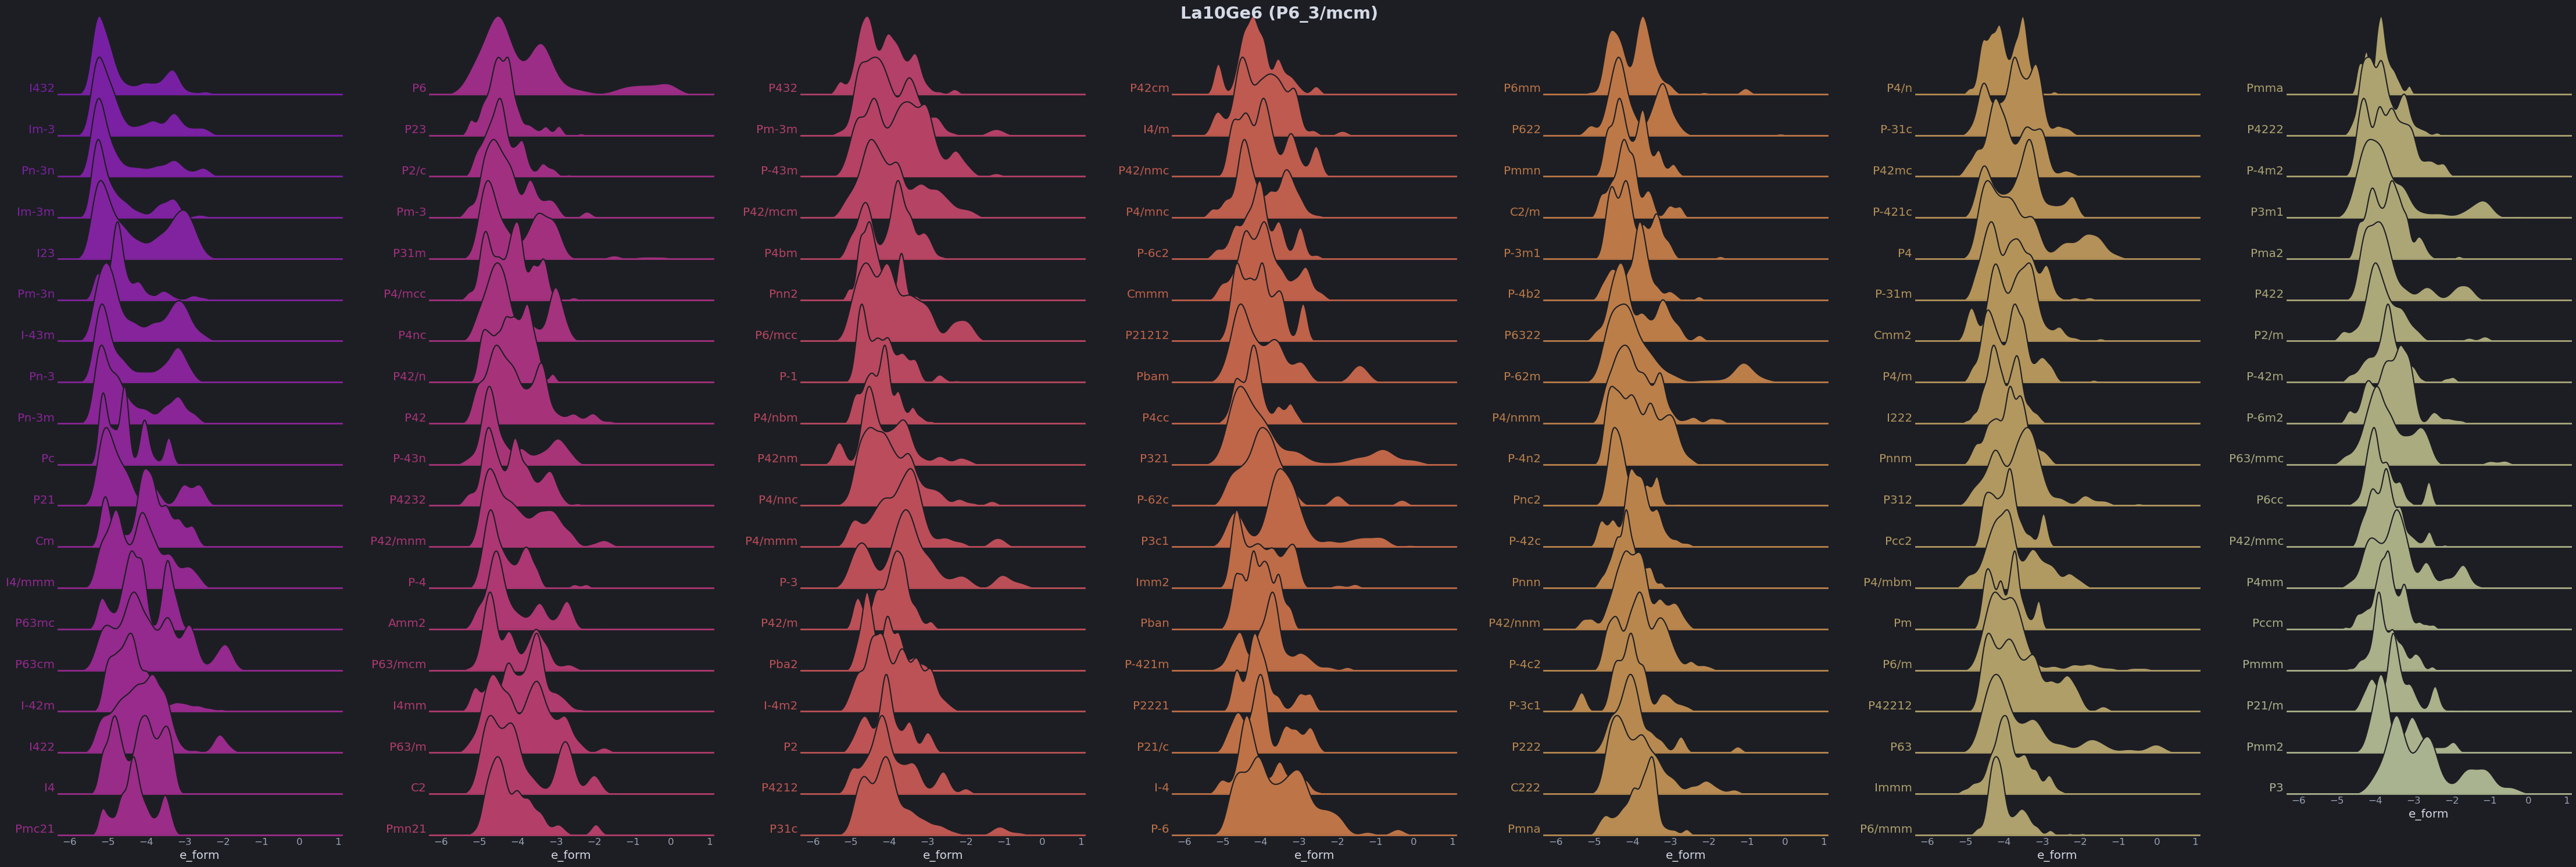

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def ridge_plot(
    df: pd.DataFrame,
    group_var: str,
    num_var: str,
    order_by = lambda x: np.quantile(x, 0.1),
    height: int = 10,
    subplot_height: float = 0.8
):
    if order_by is not None:
        order = df[[group_var, num_var]].groupby(group_var).agg(order_by)[num_var].sort_values().index
        palette = 'rho_solara'

    else:
        order = pd.unique(df[group_var])
        palette = 'rho_iso_spectra'

    hspace = -0.5
    num_rows = int(height / ((1 + hspace) * subplot_height))
    num_cols = int(np.ceil(len(order) / num_rows))
    pad_order = np.concatenate([order.values, [np.nan for _ in range(num_rows * num_cols - len(order))]], dtype=object)
    pad_order = pad_order.reshape(num_rows, num_cols)
    order_i = 0
    for j in range(num_cols):
        for i in range(num_rows):
            if not pd.isnull(pad_order[i, j]):
                pad_order[i, j] = order[order_i]
                order_i += 1
    col_order = pad_order.flatten()
    col_order = col_order[~pd.isnull(col_order)]
    hue_order = df[[group_var, num_var]].groupby(group_var).agg(order_by)[num_var].sort_values().index

    g = sns.FacetGrid(
        df, col=group_var, hue=group_var, aspect=8, height=subplot_height, col_wrap=num_cols,
        palette=palette, col_order=col_order, hue_order=hue_order, sharey=False)

    # Draw the densities in a few steps
    kde_params = dict(bw_adjust=0.5)
    g.map(sns.kdeplot, num_var, clip_on=False,
        fill=True, alpha=1, linewidth=1.5, edgecolor=plt.rcParams['figure.facecolor'], **kde_params)

    # passing color=None to refline() uses the hue mapping
    g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

    # Define and use a simple function to label the plot in axes coordinates
    def label(x, color, label):
        ax = plt.gca()
        ax.set_facecolor((0, 0, 0, 0))
        ax.set_ylabel(label, color=color, ha="right", rotation=0, y=0, va='bottom')

    g.map(label, "lattice_type")

    # Set the subplots to overlap
    g.figure.subplots_adjust(hspace=hspace)

    # Remove axes details that don't play well with overlap
    g.set_titles("")
    g.set(yticks=[])
    g.set_xlabels(num_var)
    g.despine(bottom=True, left=True)

    return g

g = ridge_plot(df.query('e_form < 0'), 'symbol', 'e_form', height=8)
g.figure.suptitle(f'{comp} ({true})')
g.savefig(f'images/{comp}_groups.png')

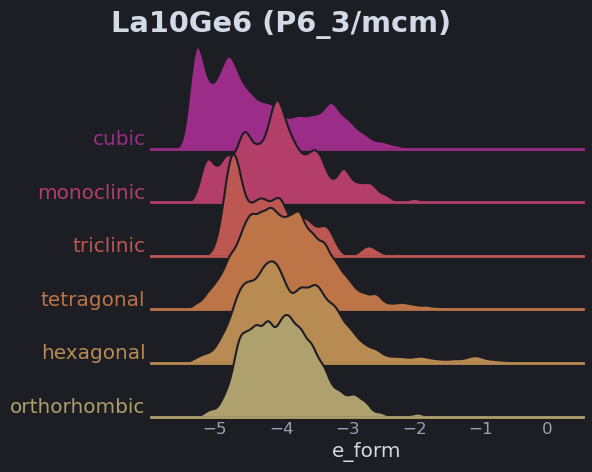

In [32]:
g = ridge_plot(df.query('e_form < 0'), 'lattice_type', 'e_form')
g.figure.suptitle(f'{comp} ({true})')
g.savefig(f'images/{comp}_systems.png')

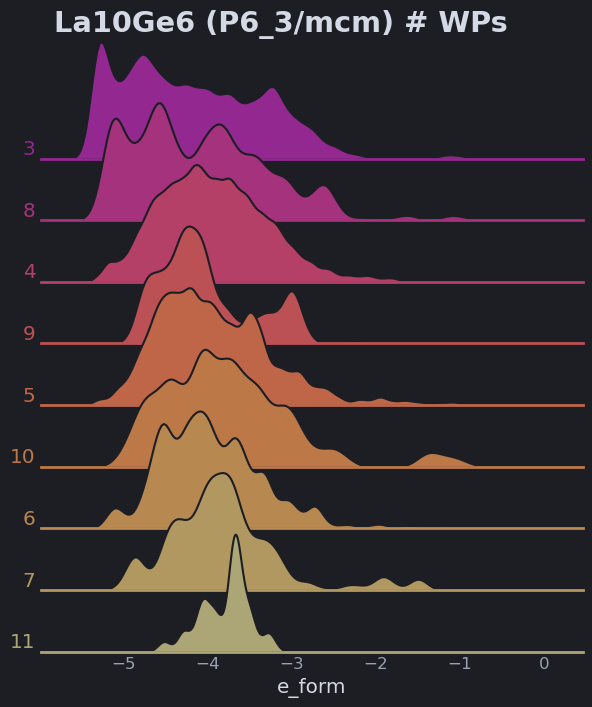

In [33]:
g = ridge_plot(df.query('e_form < 0'), 'num_pos', 'e_form')
g.figure.suptitle(f'{comp} ({true}) # WPs')
g.savefig(f'images/{comp}_num_positions.png')

In [277]:
df_sort = df.sort_values('e_form')
display(df_sort)
quick_view(df_sort.query('sg_num == 12')['gen'].iloc[0], radius_strategy='covalent')

,gen,e_form,wsyms,lat_matrix,lat_vol,lattice_type,sg_num,symbol,num_pos
569,"[[1.83238471 1.83238471 3.42376685] K, [ 1.832...",-0.518381,f_b_e_g,"[3.6647694111, 0.0, 0.0, 0.0, 3.6647694111, 0....",183.932068,tetragonal,84,P42/m,4
2138,"[[4.09150422 1.36383474 3.92820048] K, [1.3638...",-0.516426,d_c_a_g,"[5.4553389549, 0.0, 0.0, 0.0, 5.4553389549, 0....",233.812180,tetragonal,125,P4/nbm,4
568,"[[1.83238471 1.83238471 3.42376685] K, [ 1.832...",-0.497789,f_b_e_g,"[3.6647694111, 0.0, 0.0, 0.0, 3.6647694111, 0....",183.932068,tetragonal,84,P42/m,4
2254,"[[0. 2.81044149 1.90709579] K, [2.8104...",-0.491590,d_a_e,"[5.620882988, 0.0, 0.0, 0.0, 5.620882988, 0.0,...",241.013626,tetragonal,128,P4/mnc,3
2516,"[[0. 2.63533807 0. ] K, [0. ...",-0.429839,c_b_e,"[5.270676136, 0.0, 0.0, 0.0, 5.270676136, 0.0,...",199.449371,tetragonal,136,P42/mnm,3
...,...,...,...,...,...,...,...,...,...
1809,"[[0. 0. 0.] C, [3.22305489 3.22305489 0. ...",2.326968,a_h_f,"[6.4461097717, 0.0, 0.0, 0.0, 6.4461097717, 0....",259.630676,tetragonal,117,P-4b2,3
643,"[[1.25854433 3.77563298 0. ] K, [3.7756...",2.358718,a_f_c_c,"[5.0341773033, 0.0, 0.0, 0.0, 5.0341773033, 0....",265.771454,tetragonal,85,P4/n,4
5322,"[[0. 0. 0.] C, [ 0. 0. 10.999...",2.459925,a_b_i_i_i_i,"[2.1669995785, -3.7533533573, 0.0, 2.166999578...",357.848816,hexagonal,187,P-6m2,6
1703,"[[0.97644396 0. 7.63511064] N, [-0.976...",2.599741,j_g_f_g,"[3.6914479733, 0.0, 0.0, 0.0, 3.6914479733, 0....",280.437469,tetragonal,115,P-4m2,4


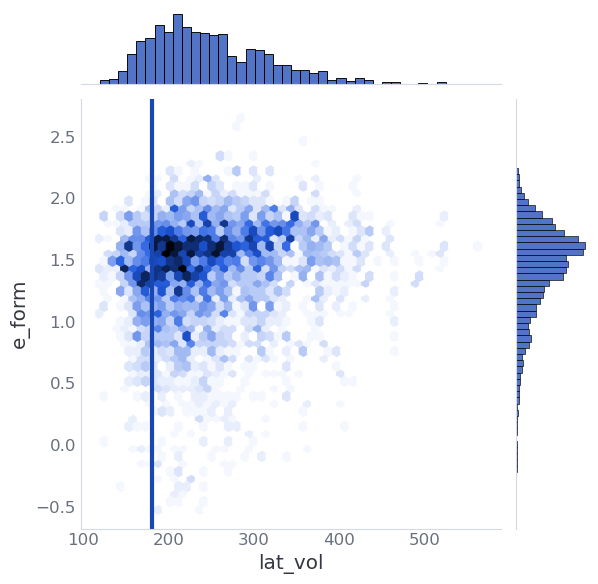

In [280]:
sns.jointplot(df, x='lat_vol', y='e_form', kind='hex')
plt.axvline(180)